In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='roberta-large'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'lr':[]}

In [4]:
learning_rates = [1.0e-5, 5.0e-5 ,1.0e-4]

for lr in learning_rates:
    print(f'Grid search {model_checkpoint}, learning rate {lr}')
    data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=16)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=0.0,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       accumulation_steps=2,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['lr'].append(lr)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search roberta-large, learning rate 1e-05


Filter:   0%|          | 0/1796 [00:00<?, ? examples/s]

Filter:   0%|          | 0/256 [00:00<?, ? examples/s]

Filter:   0%|          | 0/457 [00:00<?, ? examples/s]

Map:   0%|          | 0/1324 [00:00<?, ? examples/s]

Map:   0%|          | 0/189 [00:00<?, ? examples/s]

Map:   0%|          | 0/338 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.9928	Val Loss:	1.5466	Accuracy:	0.4822	F1:	0.3212
2 / 30: Train Loss:	0.6064	Val Loss:	0.9496	Accuracy:	0.6834	F1:	0.5126
3 / 30: Train Loss:	0.3717	Val Loss:	0.8316	Accuracy:	0.7337	F1:	0.6815
4 / 30: Train Loss:	0.2601	Val Loss:	0.7995	Accuracy:	0.7485	F1:	0.7163
5 / 30: Train Loss:	0.1640	Val Loss:	0.8053	Accuracy:	0.7633	F1:	0.7146
6 / 30: Train Loss:	0.1059	Val Loss:	0.7337	Accuracy:	0.8018	F1:	0.7795
7 / 30: Train Loss:	0.0702	Val Loss:	0.8114	Accuracy:	0.7840	F1:	0.7649
8 / 30: Train Loss:	0.0484	Val Loss:	0.8334	Accuracy:	0.7959	F1:	0.7796
9 / 30: Train Loss:	0.0428	Val Loss:	0.9136	Accuracy:	0.7544	F1:	0.7357
10 / 30: Train Loss:	0.0259	Val Loss:	0.8173	Accuracy:	0.7929	F1:	0.7817
11 / 30: Train Loss:	0.0115	Val Loss:	0.8286	Accuracy:	0.7899	F1:	0.7743
12 / 30: Train Loss:	0.0130	Val Loss:	0.8835	Accuracy:	0.7899	F1:	0.7700
13 / 30: Train Loss:	0.0079	Val Loss:	0.9952	Accuracy:	0.7781	F1:	0.7776
No improvement for 3 epochs. Stopping early.
best (higgest m

Map:   0%|          | 0/189 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.8276	Val Loss:	1.3190	Accuracy:	0.5799	F1:	0.4574
2 / 30: Train Loss:	0.4615	Val Loss:	0.8761	Accuracy:	0.7130	F1:	0.5935
3 / 30: Train Loss:	0.3019	Val Loss:	1.0222	Accuracy:	0.6716	F1:	0.6420
4 / 30: Train Loss:	0.2160	Val Loss:	0.8117	Accuracy:	0.7544	F1:	0.7198
5 / 30: Train Loss:	0.1450	Val Loss:	1.0174	Accuracy:	0.7041	F1:	0.6877
6 / 30: Train Loss:	0.1162	Val Loss:	1.1720	Accuracy:	0.7219	F1:	0.7041
7 / 30: Train Loss:	0.0788	Val Loss:	1.0364	Accuracy:	0.7692	F1:	0.7541
8 / 30: Train Loss:	0.0437	Val Loss:	1.0998	Accuracy:	0.7456	F1:	0.7354
9 / 30: Train Loss:	0.0212	Val Loss:	1.2958	Accuracy:	0.7219	F1:	0.6914
10 / 30: Train Loss:	0.0274	Val Loss:	1.4601	Accuracy:	0.7189	F1:	0.6856
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.76      0.81      0.78        67
               anecdote       0.88      0.81      0.84      

Map:   0%|          | 0/338 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.0501	Val Loss:	2.0672	Accuracy:	0.1657	F1:	0.0316
2 / 30: Train Loss:	1.0391	Val Loss:	2.0528	Accuracy:	0.1982	F1:	0.0368
3 / 30: Train Loss:	1.0345	Val Loss:	2.0481	Accuracy:	0.1686	F1:	0.0321
4 / 30: Train Loss:	1.0328	Val Loss:	2.0459	Accuracy:	0.1982	F1:	0.0368
5 / 30: Train Loss:	1.0347	Val Loss:	2.0480	Accuracy:	0.1982	F1:	0.0368
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.20      1.00      0.33        67
               anecdote       0.00      0.00      0.00        43
         cherry picking       0.00      0.00      0.00        56
      conspiracy theory       0.00      0.00      0.00        39
           fake experts       0.00      0.00      0.00        12
           false choice       0.00      0.00      0.00        13
      false equivalence       0.00      0.00      0.00        14
impossible expectations       0

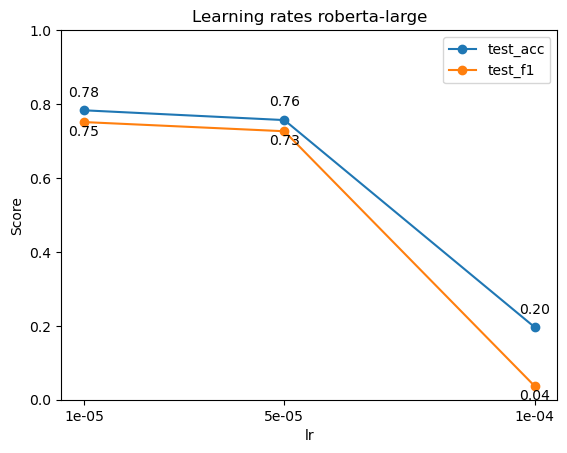

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Learning rates {model_checkpoint}',
                        column='lr',
                        sci_format=True)

In [6]:
%reset -f